## ExploreLatentSpace.v1.8

### Exploration of Latent Space through linear and nonlinear approaches: a notebook exploring and comparing the different methods of dimensionality reduction on machine learning data. 
### Author: Ashray Desai <br>Date: July 24, 2020

## System Information

<ul>
<li>OS: Windows 10 64-bit</li>
<li>CPU: Intel Core i7-6700HQ @ 2.60 GHz</li>
<li>GPU: Nvidia GeForce 940m @ 2.50 GHz</li>
<li>RAM: 8 GB DDR4</li>
<li>Python version: 3.6.4</li>
<li>Conda version: 4.8.3</li>
<li>Pandas version: 1.0.5</li>
<li>Tensorflow version: 1.15.0</li>
<li>Scikit-learn version: 0.22</li>
<li>Matplotlib version: 3.2.2</li>
<li>NumPy version: 1.15</li>
<li>Time version: 3.7</li>
<li>Seaborn version: 1.10.1</li>
</ul> 

## Summary
* Section 1 - Data Formatting
* Section 2 - PCA Latent Space
* Section 3 - Autoencoder Latent Space
* Section 4 - Variational Autoencoder (VAE) Latent Space
* Section 5 - Compression VAE Latent Space
* Section 6 - t-SNE Latent Space
* Section 7 - UMAP Latent Space
* Section 8 - Comparitive Analysis
* Section 9 - Conclusion

## Section 1 - Data Formatting

In [30]:
"""
This notebook works with both the MNIST and Fashion MNIST datasets. Due to the computationally expensive nature of some
of these algorithms, I take a random sample of the provided training examples for use with these dimensionality reduction
approaches.
This code was adapted from several source websites (proper citations to be added soon)

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://towardsdatascience.com/compressionvae-a-powerful-and-versatile-alternative-to-t-sne-and-umap-5c50898b8696
https://towardsdatascience.com/teaching-a-variational-autoencoder-vae-to-draw-mnist-characters-978675c95776
"""
from __future__ import print_function
import pandas as pd 
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

import tensorflow as tf
print('tf: %s' % tf.__version__)

tf: 1.15.3


In [31]:
mnist_digits = fetch_openml('mnist_784', version=1, cache=True, as_frame=True)
mnist_fashion = fetch_openml(name="Fashion-MNIST", version=1, cache=True, as_frame=True)

In [32]:
# Replace this the assignment in this line with either 'mnist_normal' or 'mnist_fashion' to generate plots
# for that dataset
mnist = mnist_digits

In [33]:
X = mnist.data #X and y are both numpy ndArrays
y = mnist.target
df = mnist.frame

df['label'] = y.apply(lambda i: str(i))# apply labels to each dataframe entry

print(df) #visualize the dataframe

# Randomly samples a sample of the data, with a seed for reproduceability
numTrainingSamplesToUse = 10000
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

feat_cols = [ 'pixel'+ str(i + 1) for i in range(X.shape[1]) ]
df_subset = df.loc[rndperm[:numTrainingSamplesToUse],:].copy()
data_subset = df_subset[feat_cols].values

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

#### This cell provides reduction of the dimensionality of the data to 50 dimensions with PCA before using the other approaches. This approach will be compared with each of the other approaches on their own.

In [34]:
from sklearn.decomposition import PCA

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

## Section 2 - PCA Latent Space

In [50]:
'''
PCA - faster than t-SNE, but distinctions between different digits are less obvious, 
'''

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

time_start = time.time()
pca_result = pca.fit_transform(df_subset[feat_cols].values)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
pca_pca_result = pca.fit_transform(pca_result_50)
df_subset['pca-pca50-one'] = pca_pca_result[:,0]
df_subset['pca-pca50-two'] = pca_pca_result[:,1] 
print('PCA with PCA preprocess done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.5666754245758057 seconds
PCA with PCA preprocess done! Time elapsed: 0.04850292205810547 seconds


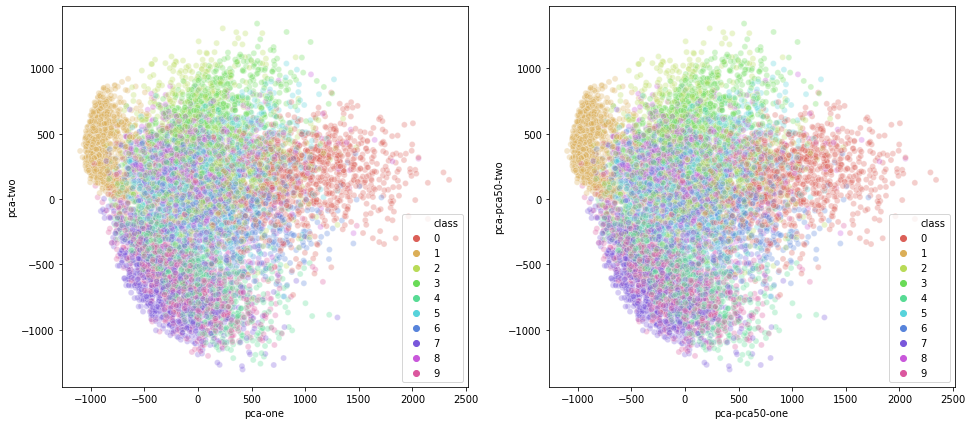

In [51]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1) # Plot PCA
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2) # Plot PCA with PCA preprocessing
sns.scatterplot(
    x="pca-pca50-one", y="pca-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

## Section 3 - Autoencoder Latent Space

In [37]:
"""
AutoEncoders. Work in Progress.
"""

'\nAutoEncoders. Work in Progress.\n'

## Section 4 - Variational Autoencoder (VAE) Latent Space

In [38]:
"""
VAE. Work in Progress.
"""
# https://github.com/qbeer/wigner-csnl-textures

'\nVAE. Work in Progress.\n'

## Section 5 - Compression VAE (CVAE) Latent Space

In [39]:
"""
CVAE (Compression Variational Autoencoder) learns faster and generates a smoother embedding space than t-SNE and UMAP.
"""
from cvae import cvae# Initialise the tool, assuming we already have an array X containing the data 

time_start = time.time()
embedder = cvae.CompressionVAE(data_subset)# Specify the dimensionality we want (default is 2 dimensions)
embedder.train() # Train the model 
print('CVAE done! Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
embedder_pca = cvae.CompressionVAE(pca_result_50)
embedder_pca.train() # Train the model 
print('CVAE with PCA preprocess done! Time elapsed: {} seconds'.format(time.time()-time_start))


Total amount of data:  9000
Input feature dimension:  784
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  1000
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from /tf/notebook/temp ... No checkpoint found.
No model found to restore. Initialising new model.
Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 275.930, test_loss = 431.909, lr = 0.00100, (0.019 sec/step)
Storing checkpoint to /tf/notebook/temp ... Done.
step 50; epoch 0.36 - loss = 276.025, test_loss = 428.989, lr = 0.00100, (0.004 sec/step)
step 100; epoch 0.71 - loss = 277.187, test_loss = 414.465, lr = 0.00100, (0.004 sec/step)
step 150; epoch 1.07 - loss = 283.324, test_loss = 412.616, lr = 0.00100, (0.003 sec/step)
step 200; epoch 1.42 - loss = 497.221, test_loss = 410.245, lr = 0.00100, (0.004 sec/step)
step 250; epoch 1.78 - loss = 290.505, test_loss = 406.896, lr = 0.001

step 650; epoch 4.62 - loss = 24.686, test_loss = 24.781, lr = 0.00100, (0.002 sec/step)
step 700; epoch 4.98 - loss = 23.613, test_loss = 24.792, lr = 0.00100, (0.003 sec/step)
step 750; epoch 5.33 - loss = 25.423, test_loss = 24.791, lr = 0.00100, (0.003 sec/step)
step 800; epoch 5.69 - loss = 25.369, test_loss = 24.794, lr = 0.00100, (0.002 sec/step)
step 850; epoch 6.04 - loss = 23.968, test_loss = 24.777, lr = 0.00100, (0.003 sec/step)
step 900; epoch 6.40 - loss = 24.895, test_loss = 24.787, lr = 0.00100, (0.002 sec/step)
step 950; epoch 6.76 - loss = 22.978, test_loss = 24.794, lr = 0.00100, (0.003 sec/step)
step 1000; epoch 7.11 - loss = 24.868, test_loss = 24.782, lr = 0.00100, (0.002 sec/step)
step 1050; epoch 7.47 - loss = 27.389, test_loss = 24.784, lr = 0.00100, (0.003 sec/step)
No improvement on validation data for 5 test steps. Decreasing learning rate by factor 5
step 1100; epoch 7.82 - loss = 23.204, test_loss = 24.772, lr = 0.00020, (0.003 sec/step)
step 1150; epoch 8

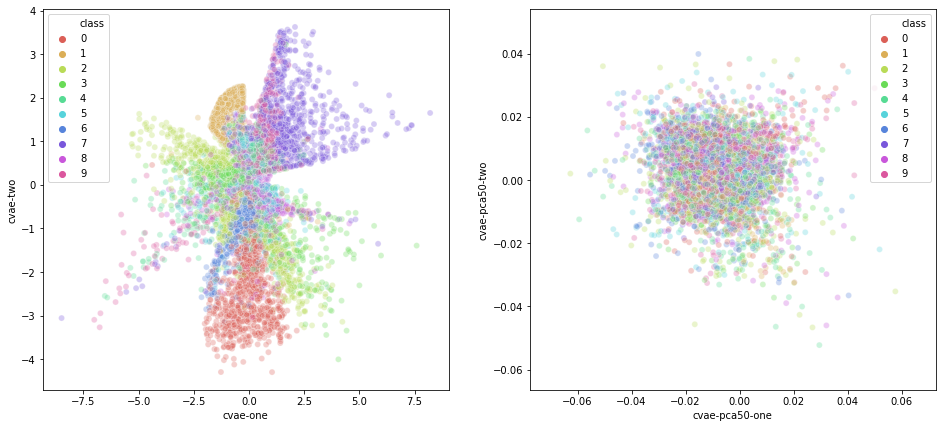

In [52]:
z = embedder.embed(data_subset)
z_pca = embedder_pca.embed(pca_result_50)

# Plot the latent space of CVAE 
df_subset['cvae-one'] = z[:,[0]]
df_subset['cvae-two'] = z[:,[1]]

# Plot the latent space of CVAE with PCA preprocessing
df_subset['cvae-pca50-one'] = z_pca[:,[0]]
df_subset['cvae-pca50-two'] = z_pca[:,[1]]

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1) # Plot CVAE 
sns.scatterplot(
    x="cvae-one", y="cvae-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax = ax1
)
ax2 = plt.subplot(1, 2, 2) # Plot CVAE 
sns.scatterplot(
    x="cvae-pca50-one", y="cvae-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax = ax2
)

##### Since CVAE supports visualization of interpolation within the latent space, we can visualize the latent space and generate a continuous<br>representation of written numbers.

<Figure size 1008x504 with 0 Axes>

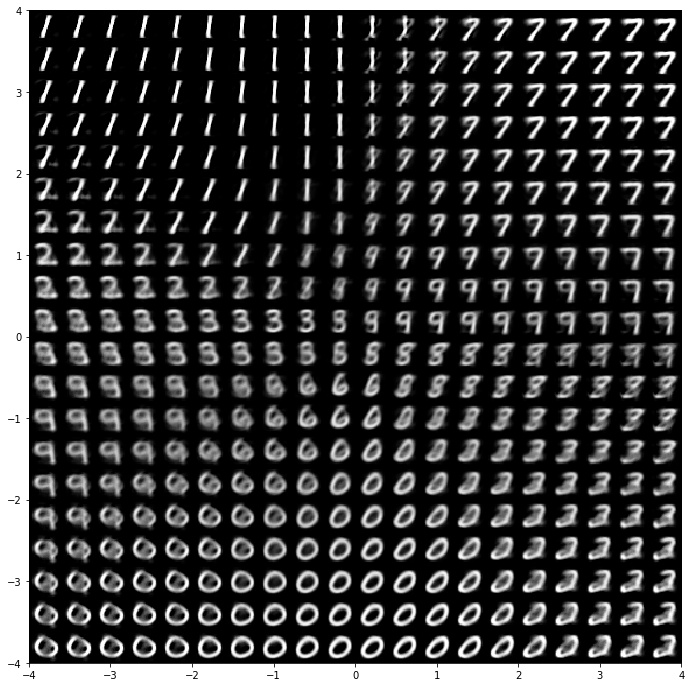

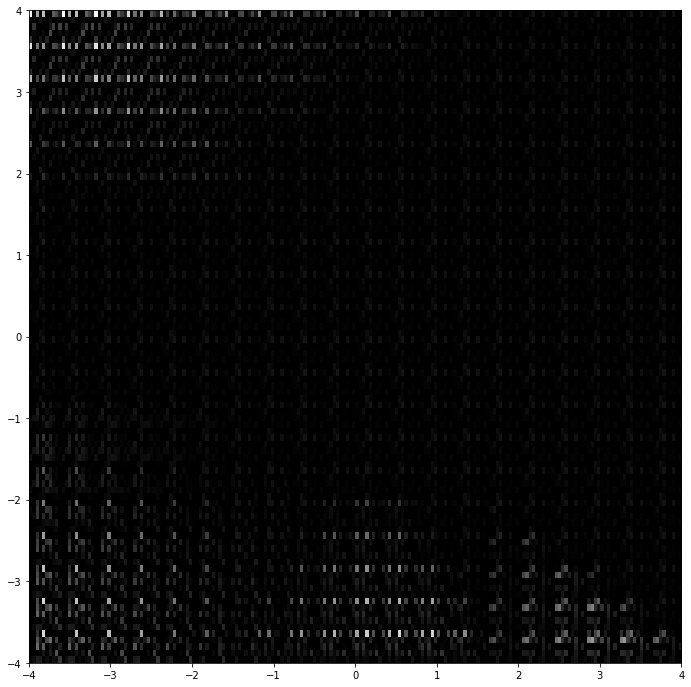

In [41]:
# The "learned space/latent grid" generates in-betweens of different discrete data points
plt.figure(figsize=(14,7))
embedder.visualize_latent_grid(xy_range=(-4.0, 4.0),grid_size=20,shape=(28, 28))
embedder_pca.visualize_latent_grid(xy_range=(-4.0, 4.0),grid_size=20,shape=(5, 10))

## Section 6 - t-SNE Latent Space

In [42]:
'''
t-SNE - slowest of all, but has many useful features for visualization. Does not scale well to data with many features,
which is why many people use PCA and t-SNE to supplement each other.
'''

N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE with PCA preprocessing done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.862s...
[t-SNE] Computed neighbors for 10000 samples in 126.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 438.329018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.257385
[t-SNE] KL divergence after 300 iterations: 2.822328
t-SNE done! Time elap

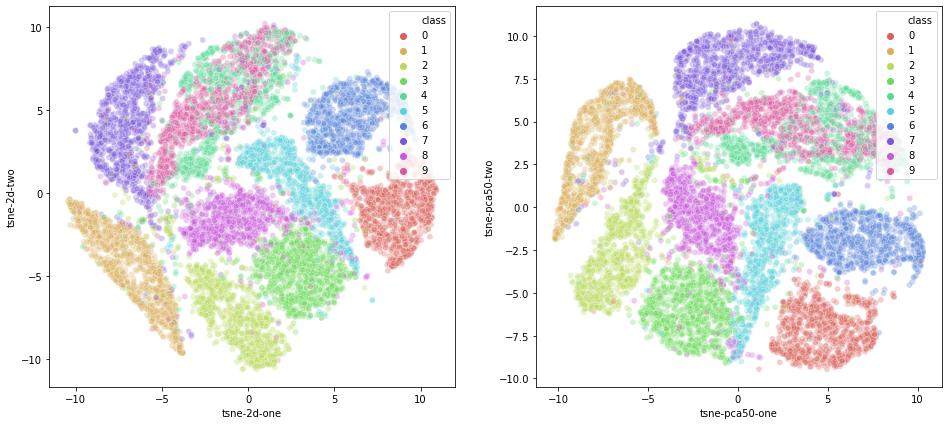

In [53]:
# Plot the t-SNE transformation of the data into 2 dimensions

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1] 

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax2
)

## Section 7 - UMAP Latent Space

In [44]:
'''
UMAP
'''
# Installs pandas matplotlib datashader bokeh holoviews colorcet
# !pip install umap-learn[plot]
'''
Installing collected packages: PyYAML, pillow, packaging, typing-extensions, bokeh, param, pyct, 
pyviz-comms, panel, holoviews, toolz, locket, partd, fsspec, cloudpickle, click, tblib, sortedcontainers, 
immutables, contextvars, psutil, msgpack, heapdict, zict, distributed, dask, xarray, colorcet, multipledispatch, 
datashape, datashader
'''
import umap
from sklearn.datasets import load_digits
import umap.plot

time_start = time.time()
embedding = umap.UMAP().fit_transform(df_subset)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
embeddingPCA = umap.UMAP().fit_transform(pca_result_50)
print('UMAP with PCA preprocess done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 21.30107831954956 seconds
UMAP with PCA preprocess done! Time elapsed: 18.081759214401245 seconds


[[ 7.004371   6.197071 ]
 [11.033801   1.6194514]
 [ 5.1729255  6.1138573]
 ...
 [ 4.464314   8.315624 ]
 [ 4.7310367  8.006625 ]
 [ 5.357319   7.583018 ]]
[[ 7.5269394  4.2394905]
 [ 9.310529  -0.6363718]
 [ 5.6300993  4.6638436]
 ...
 [ 5.5671387  7.2800508]
 [ 5.2827744  6.8334417]
 [ 5.864584   6.4525642]]


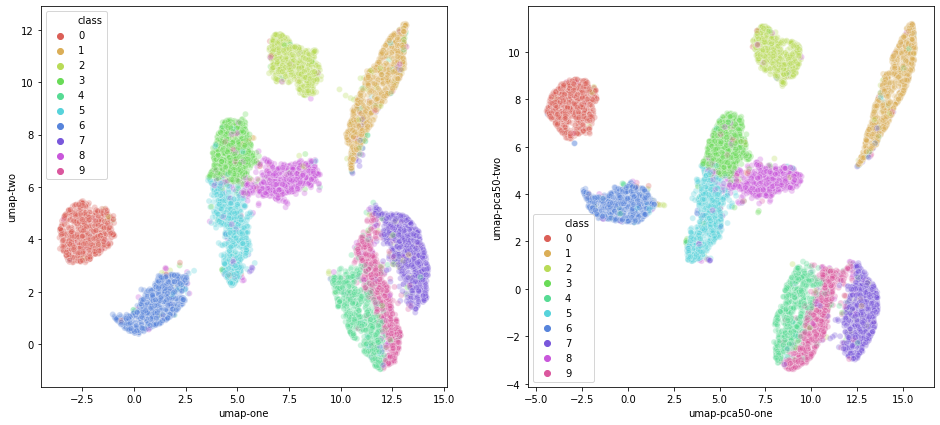

In [54]:
print(embedding)
print(embeddingPCA)

# MAP the UMAP transformation of the data into a 2 dimensional latent space
df_subset['umap-one'] = embedding[:,[0]]
df_subset['umap-two'] = embedding[:,[1]]

df_subset['umap-pca50-one'] = embeddingPCA[:,[0]]
df_subset['umap-pca50-two'] = embeddingPCA[:,[1]]

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="umap-pca50-one", y="umap-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax2
)

##### Since UMAP supports visualization of interpolation within the latent space, we can visualize the latent space and generate a continuous<br>representation of written numbers.

In [46]:
mapper = umap.UMAP().fit(data_subset)
mapper_pca = umap.UMAP().fit(pca_result_50)

In [47]:
from matplotlib.gridspec import GridSpec

#Each corner is places in a neighborhood of numbers
corners = np.array([
    [1, 1],  
    [-2, 4],  
    [12, 2],  
    [12, 8],  
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 20)
    for x in np.linspace(0, 1, 20)
])
inv_transformed_points = mapper.inverse_transform(test_pts)
pca_inv_transformed_points = mapper_pca.inverse_transform(test_pts)

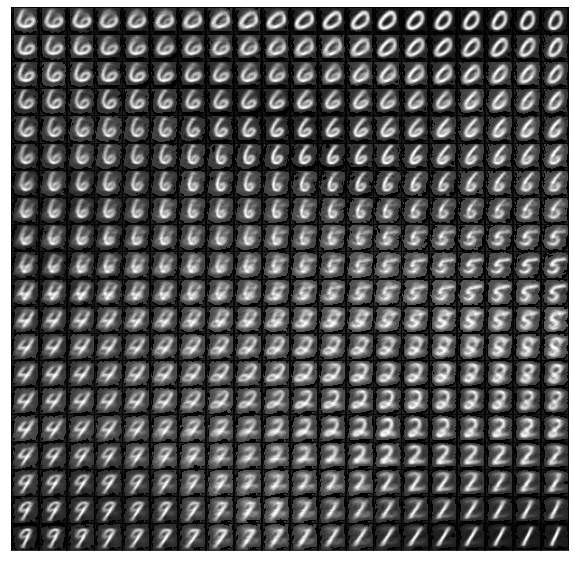

In [48]:
# Set up the grid
fig = plt.figure(figsize=(10,10))
gs = GridSpec(20, 20, fig, hspace = 0, wspace = 0)

digit_axes = np.zeros((20, 20), dtype=object)
for i in range(20):
    for j in range(20):
        digit_axes[i, j] = fig.add_subplot(gs[i, j])


# Plot each of the generated digit images
for i in range(20):
    for j in range(20):
        digit_axes[i, j].imshow(inv_transformed_points[i*20 + j].reshape(28, 28), cmap = "gist_gray")
        digit_axes[i, j].set(xticks=[], yticks=[])

## Section 8 - Comparative Analysis

'\nComing up: \n- Plot VAE and AutoEncoder here (after doing them)\n- Plot embedding spaces of AE, VAE, CVAE, and UMAP, both with and without PCA before\n'

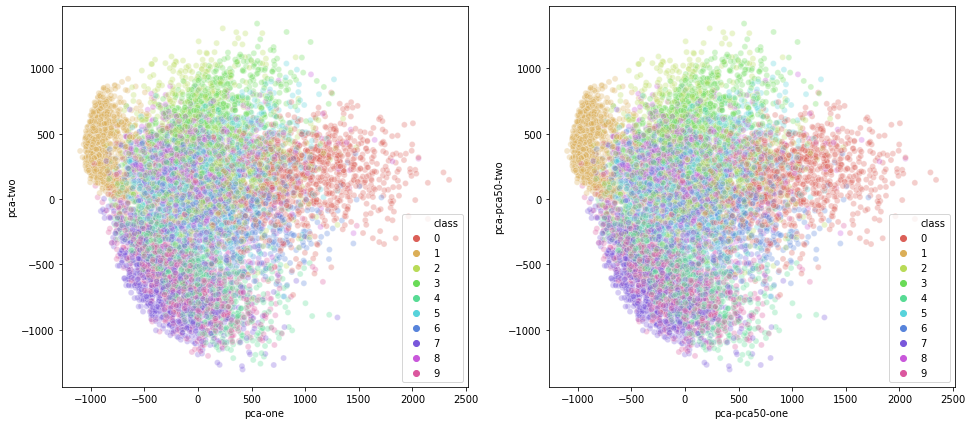

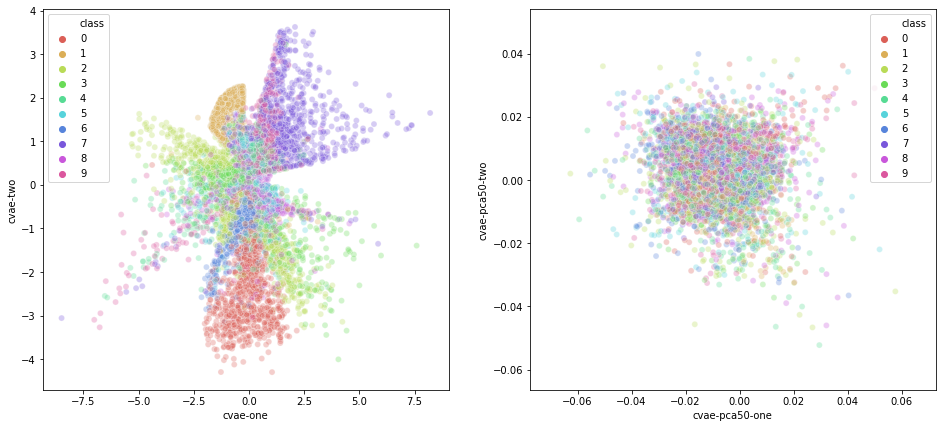

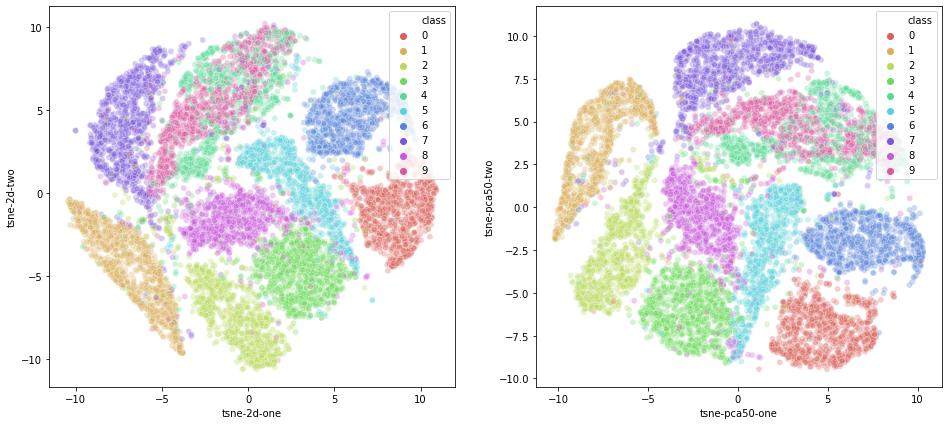

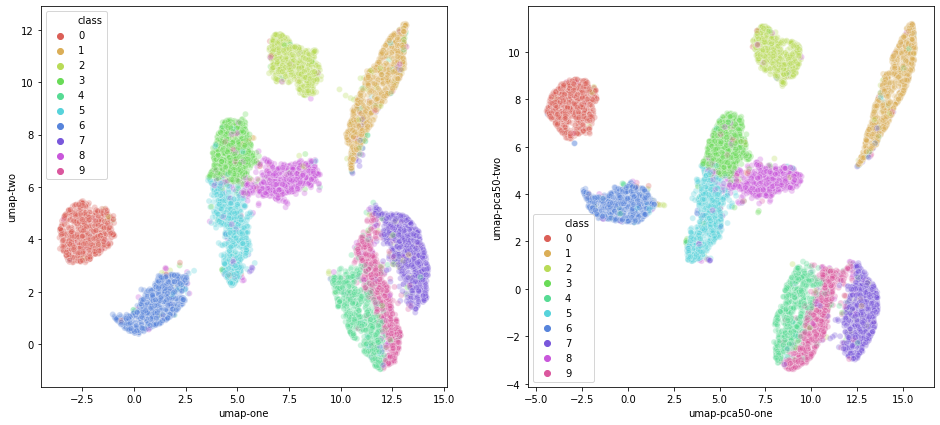

In [55]:
############################ PCA PLOTS
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca-pca50-one", y="pca-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

############################ AutoEncoder PLOTS

############################ VAE PLOTS

############################ CVAE PLOTS
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1) # Plot CVAE 
sns.scatterplot(
    x="cvae-one", y="cvae-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax = ax1
)
ax2 = plt.subplot(1, 2, 2) # Plot CVAE 
sns.scatterplot(
    x="cvae-pca50-one", y="cvae-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data= df_subset,
    legend="full",
    alpha=0.3,
    ax = ax2
)

############################ TSNE PLOTS
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax2
)

############################ UMAP PLOTS
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="umap-pca50-one", y="umap-pca50-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax = ax2
)

'''
Coming up: 
- Plot VAE and AutoEncoder here (after doing them)
- Plot embedding spaces of AE, VAE, CVAE, and UMAP, both with and without PCA before
'''

### Time data, from longest to shortest:
#### MNIST / No PCA preprocessing
* **t-SNE**: 231.88232898712158 seconds
* **CVAE**: 137.88789439201355 seconds
* **UMAP**: 28.77687096595764 seconds
* **PCA**: 0.9477381706237793 seconds

#### MNIST with PCA preprocessing
* **t-SNE w/ PCA**: 42.38400197029114 seconds
* **CVAE w/PCA**: 94.04471707344055 seconds
* **UMAP w/PCA**: 12.365996599197388 seconds 
* **PCA w/PCA**: 0.050002336502075195 seconds

#### Fashion MNIST / No PCA preprocessing
* **t-SNE**: 240.31664323806763 seconds
* **CVAE**: 95.74360394477844 seconds
* **UMAP**: 24.186230182647705 seconds
* **PCA**: 13.885681867599487 seconds

#### Fashion MNIST with PCA preprocessing
* **t-SNE w/ PCA**: TBD
* **CVAE w/PCA**: TBD
* **UMAP w/PCA**: TBD
* **PCA w/PCA**: TBD

## Quantitative Comparison: <br>Comparing intraclass and interclass distances

In [ ]:
# Zero-mean and feature scaling on all data
# Function featureScale - Perform feature scaling on all of the different method's low-dim data
def featureScale(columnName):
    col_unnormalized = df_subset[columnName]
    # Get all features between -1 and 1
    col_scaled = (col_unnormalized - np.amin(col_unnormalized)) / (np.amax(col_unnormalized) - np.amin(col_unnormalized))
    # Get all features to have a minimum of zero
    col_zeroMean = (col_scaled - np.mean(col_scaled)) / (np.amax(col_scaled) - np.amin(col_scaled))
    df_subset['{}-scaled'.format(columnName)] = col_zeroMean

featureScale('tsne-2d-one')
featureScale('tsne-2d-two')
featureScale('umap-one')
featureScale('umap-two')
featureScale('cvae-one')
featureScale('cvae-two')
featureScale('pca-one')
featureScale('pca-two')

In [ ]:
# Function to compute the interclass and intraclass distance of a method's latent space
# Variables col1 and col2 represent a certain method's computed x1 and x2 features
def classDistance(col1, col2):
    
    index1 = df_subset.columns.get_loc(col1)
    index2 = df_subset.columns.get_loc(col1)
    
    total_intraclass_dist = 0
    centroidArray = [] # Will store information needed to calculate interclass distance

    for i in range(10):
       
        centroid_x1, centroid_x2, counter = findCentroidCoords(i, index1, index2)
        centroidArray.append([centroid_x1, centroid_x2, counter]) #Add this centroid to the array
        
        totaldist_x1 = 0
        totaldist_x2 = 0
        intraclass_dist = 0

        for example in df_subset.T.iteritems():
            if example[1][785] == str(i):
                totaldist_x1 = totaldist_x1 + abs(centroid_x1 - example[1][index1])
                totaldist_x2 = totaldist_x2 + abs(centroid_x2 - example[1][index2])

        intraclass_x1 = totaldist_x1 / counter;
        intraclass_x2 = totaldist_x2 / counter;

        intraclass_dist = intraclass_dist + (intraclass_x1 ** 2 + intraclass_x2 ** 2) ** 0.5
        total_intraclass_dist = total_intraclass_dist + intraclass_dist

    avg_interclass_dist = findInterclassDistance(centroidArray)    
    avg_intraclass_dist = total_intraclass_dist / 10 #AVERAGE INTRACLASS DISTANCE FOR THIS APPROACH
    return avg_intraclass_dist, avg_interclass_dist


def findCentroidCoords(i, index1, index2):
    sum_x1 = 0
    sum_x2 = 0
    counter = 0

    for example in df_subset.T.iteritems():
        if example[1][785] == str(i):
            counter = counter + 1;
            sum_x1 = example[1][index1]
            sum_x2 = example[1][index2]

    centroid_x1 = sum_x1 / counter
    centroid_x2 = sum_x2 / counter
    return centroid_x1, centroid_x2, counter

# A function to find the average weighted distance between all centroids in a given approach
def findInterclassDistance(centroidArray):
    total_interclass_dists = 0
    for index1 in range(len(centroidArray)):
        weight = centroidArray[index1][2] #The count represents the weight of this centroid
        x1coord = centroidArray[index1][0]
        x2coord = centroidArray[index1][1]
        this_interclass_dist = 0    
        
        for index2 in range(len(centroidArray)):
            other_x1coord = centroidArray[index2][0]
            other_x2coord = centroidArray[index2][1] 
            # accumulates sum of distances from index1's centroid to all other centroids
            weightedDist = weight * (((x1coord - other_x1coord) ** 2 + (x1coord - other_x1coord) ** 2 ) ** 0.5)
            this_interclass_dist = this_interclass_dist + weightedDist
            
        
        # Average interclass distance from index1's centroid to all the other centroids
        this_interclass_avg = this_interclass_dist / 10
        total_interclass_dists = total_interclass_dists + this_interclass_avg
        
    avg_interclass_dist = total_interclass_dists / 10 #AVERAGE INTERCLASS DISTANCE OF ALL CENTROIDS FOR THIS APPROACH
    return avg_interclass_dist

In [ ]:
pca_intra, pca_inter = classDistance('pca-one-scaled', 'pca-two-scaled')
cvae_intra, cvae_inter = classDistance('cvae-one-scaled', 'cvae-two-scaled')
tsne_intra, tsne_inter = classDistance('tsne-2d-one-scaled', 'tsne-2d-two-scaled')
umap_intra, umap_inter = classDistance('umap-one-scaled', 'umap-two-scaled')

print('PCA interclass distance: {}'.format(pca_inter))
print('PCA intraclass distance: {}'.format(pca_intra))
print('CVAE interclass distance: {}'.format(cvae_inter))
print('CVAE intraclass distance: {}'.format(cvae_intra))
print('t-SNE interclass distance: {}'.format(tsne_inter))
print('t-SNE intraclass distance: {}'.format(tsne_intra))
print('UMAP interclass distance: {}'.format(umap_inter))
print('UMAP intraclass distance: {}'.format(umap_intra))

#### Results -  MNIST Digits

| DR Algorithm | Intraclass distance | Interclass distance |  | Intraclass distance w/ PCA50 | Interclass distance w/ PCA50|
| --- | --- | --- | | --- | --- | 
| PCA | 0.1846839432781619| 0.2514883636037526 |  | TBD | TBD | 
| AutoEncoder | TBD  | TBD |  | TBD | TBD | |  |  |  |  |  |
| VAE | TBD |  TBD |   | TBD | TBD |  |  | |  |  |  |
| CVAE | 0.07370805122572618 | 0.16102034277326321 |  | TBD | TBD | 
| t-SNE | 0.2913386100985398 | 0.42389463159368007 | | TBD | TBD | 
| UMAP | 0.3399398323304261 | 0.3990936375442698 | | TBD | TBD | 

#### Results - Fashion MNIST 

| DR Algorithm | Intraclass distance | Interclass distance | | Intraclass distance w/ PCA50 | Interclass distance w/PCA50 |
| --- | --- | --- | ---  | --- | --- |
| PCA | 0.28360059659323616 | 0.3035366965023135 |  | TBD | TBD | 
| AutoEncoder | TBD | TBD | | TBD | TBD |
| VAE | TBD | TBD || TBD | TBD |
| CVAE | 0.16877078487746006 | 0.16877078487746006 |  | TBD | TBD | 
| t-SNE | 0.2874850425821715 | 0.4589765706187342 |  | TBD | TBD | 
| UMAP | 0.4233480483140607| 0.44498628134312995 | | TBD | TBD |

#### Comparative Analysis - Other Info

| DR Algorithm | Number of Input Parameters | Number of Internal Parameters | Creates Generative Model? |
| --- | --- | --- | --- |
| PCA | 7 |  | No |
| AutoEncoder |  |  | Yes |
| VAE|  |  | Yes |
| CVAE  | 11 |  | Yes |
| t-SNE | 14 |  | No |
| UMAP  | 26 |  | Yes |

In [ ]:
'''
Coming up:
- Fix the math so that numbers make more sense
- Calculate all values for PCA preprocessing
'''

## Section 9: Conclusion

**PCA:**
Finds a linear vector space that minimizes the errors caused by projecting data from a higher dimensional space into lower dimensions. Improves visualization, since outputs are meaningful. However, cannot extract polynomial features that can illustrate more complex relationships between features and classes of training examples. This can cause information loss when attempting to make polynomial relationships fit into a plane or line

**AutoEncoders:**
Unsupervised neural network which encodes data in a lower dimensional space for compression and then decodes the encoded information to retrieve as close to the same data as possible. Can generate the latent space of the data very quickly, but latent space is not generative.

**VAE:**
Autoencoders, but that can create generative models of latent space. Can be used to explore data effectively and create new samples of data.

**CVAE:**
Functionally the same as a VAE, but learns a much smoother latent space to generate cleaner new samples. Much faster than t-SNE but needed more data to work well (the 10000 samples I used were sufficient).
CVAE preserves localhood better than UMAP, and global picture better than t-SNE.

**t-SNE:**
Calculates probability of every point being a neighbor/ in the same class as every other point in the dataset in both the high-dimensional space and the projected low-dimensional space. Aims to output the low-dimensional space where the differences in these probabilities are minimized. Has many features for effective data visualization and requires less data to work, but the input features cannot be identified after transforming, rendering the latent space unusable for anything other than visualization.

**UMAP:**
Similar to t-SNE but clusters are much more apparent. Preserves global structure through clustering, and is useful as a dimensionality reduction tool for machine learning as well as a visualization tool, unlike t-SNE. However, the ability to depict localhood is impeded, making generative spaces flow less smoothly.
